#This notebook contains the clustering models analysis

#Library importing

In [3]:
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import re
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from nltk.tokenize import RegexpTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import nltk
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data importing and preprocessing

In [4]:
stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

df = pd.read_csv("fake_job_postings.csv")

# print('\n',df.isnull().sum()/len(df))
# #drop all features with missing values % greather than 50%
# print("\nDropped features: department, salary_range, job_id, benefits since\n is_null().sum()/len(df) >= 0.5\n")
df = df.drop('department',axis=1)
df = df.drop('salary_range',axis=1)
df = df.drop('job_id',axis = 1)
df = df.drop('benefits', axis = 1)
df = df.replace(np.nan, '', regex=True)

#combine all the text data into one column
df['full_text'] = df['title'] + ' ' + df['location'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' +  df['requirements'] + ' ' + df['employment_type'] + ' ' +  df['required_education'] + ' ' + df['required_experience'] + ' '+ df['industry'] + ' ' +  df['function']
#remove the joined text columns from the dataset
df.drop(['title','location','company_profile', 'industry','description','requirements', 'employment_type', 'required_education', 'required_experience'], axis=1, inplace=True)


def clean_text(text, ):
        if text is not None:
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)
        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                #text = re.sub(r'[0-9]+','',text)
        # strip html 
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)

        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)

        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text) # stemming
        text = remove_stopwords(text) # remove stopwords

        return text
df['full_text'] = df['full_text'].apply(clean_text)
df['full_text'].head()

0    market intern us ny new york food weve creat g...
1    custom servic cloud video product nz auckland ...
2    commiss machineri assist cma us ia wever valor...
3    account execut washington dc us dc washington ...
4    bill review manag us fl fort worth spotsourc s...
Name: full_text, dtype: object

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['function']= label_encoder.fit_transform(df['function'])
df
# df.to_csv('combined_text.csv') #load combined dataset
# files.download('combined_text.csv')
# df = pd.read_csv('combined_text.csv')

,telecommuting,has_company_logo,has_questions,function,fraudulent,full_text
0,0,1,0,23,0,market intern us ny new york food weve creat g...
1,0,1,0,8,0,custom servic cloud video product nz auckland ...
2,0,1,0,0,0,commiss machineri assist cma us ia wever valor...
3,0,1,0,32,0,account execut washington dc us dc washington ...
4,0,1,1,17,0,bill review manag us fl fort worth spotsourc s...
...,...,...,...,...,...,...
17875,0,1,1,32,0,account director distribut ca toronto vend loo...
17876,0,1,1,1,0,payrol account us pa philadelphia weblinc ecom...
17877,0,0,0,0,0,project cost control staff engin cost control ...
17878,0,0,1,10,0,graphic design ng la lago nemsia studio look e...


#Vectorization of sentences into words for each job description using td_idf and count vectorizer

In [6]:



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 200) #set features

text_num_tfidf = tfidf.fit_transform(df['full_text'])

df_tfidf = pd.DataFrame(text_num_tfidf.toarray(), columns=tfidf.get_feature_names())

df.drop(["full_text"], axis=1, inplace=True)
main_df_tfidf = pd.concat([df_tfidf,df], axis=1)

main_df_tfidf

,abil,abl,account,across,activ,administr,agenc,also,amp,analyt,andor,ani,appli,applic,area,assist,associ,avail,bachelor,base,best,brand,build,busi,candid,care,career,chang,client,close,collabor,commun,compani,comput,consult,content,continu,contract,creat,creativ,...,softwar,solut,staff,startup,strategi,strong,success,support,system,take,talent,team,technic,technolog,test,thi,time,tool,train,understand,us,use,user,valu,want,way,web,websit,well,within,work,world,written,year,youll,telecommuting,has_company_logo,has_questions,function,fraudulent
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.207550,0.000000,0.077741,0.068849,0.000000,0.097803,0.182108,0.000000,0.000000,0.000000,0.092456,0.000000,0.000000,0.000000,0.000000,0.080026,0.000000,0.000000,0.059130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098407,0.109871,0.051155,0.000000,0.000000,0.329589,0.0,0.000000,0.076702,0.000000,...,0.000000,0.000000,0.101868,0.098769,0.000000,0.000000,0.000000,0.140113,0.081293,0.000000,0.087867,0.095120,0.000000,0.065701,0.000000,0.000000,0.062541,0.000000,0.000000,0.000000,0.044701,0.067114,0.0,0.000000,0.000000,0.090438,0.000000,0.208251,0.000000,0.000000,0.170921,0.000000,0.000000,0.000000,0.000000,0,1,0,23,0
1,0.000000,0.036282,0.041622,0.000000,0.000000,0.045942,0.087776,0.000000,0.060960,0.000000,0.043298,0.000000,0.000000,0.030859,0.000000,0.000000,0.000000,0.000000,0.000000,0.032115,0.000000,0.207650,0.000000,0.078532,0.000000,0.000000,0.000000,0.000000,0.089023,0.000000,0.000000,0.097282,0.045293,0.037058,0.000000,0.097275,0.0,0.000000,0.000000,0.000000,...,0.034414,0.000000,0.000000,0.043726,0.000000,0.000000,0.159855,0.000000,0.035989,0.036781,0.077799,0.084221,0.000000,0.000000,0.000000,0.025717,0.027688,0.000000,0.000000,0.032994,0.000000,0.029712,0.0,0.000000,0.000000,0.000000,0.000000,0.046097,0.000000,0.000000,0.113502,0.330522,0.000000,0.000000,0.000000,0,1,0,8,0
2,0.000000,0.000000,0.000000,0.086624,0.435955,0.000000,0.000000,0.000000,0.066889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135641,0.000000,0.097454,0.000000,0.195364,0.000000,0.000000,0.000000,0.149096,0.000000,0.000000,0.000000,0.0,0.094292,0.000000,0.000000,...,0.000000,0.070116,0.000000,0.000000,0.000000,0.151215,0.070161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091521,0.000000,0.000000,0.000000,0.000000,0.000000,0.043429,0.000000,0.0,0.000000,0.000000,0.087864,0.000000,0.000000,0.000000,0.000000,0.083028,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0
3,0.033180,0.000000,0.482886,0.000000,0.000000,0.048455,0.000000,0.000000,0.000000,0.000000,0.045667,0.000000,0.039963,0.000000,0.000000,0.000000,0.000000,0.000000,0.068669,0.000000,0.000000,0.000000,0.033535,0.248485,0.000000,0.000000,0.000000,0.083737,0.000000,0.000000,0.045949,0.025651,0.023886,0.039085,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.036296,0.067397,0.000000,0.000000,0.136779,0.036338,0.033720,0.000000,0.113874,0.038793,0.000000,0.088828,0.000000,0.122710,0.000000,0.000000,0.000000,0.000000,0.000000,0.139198,0.020872,0.000000,0.0,0.045295,0.000000,0.000000,0.000000,0.000000,0.000000,0.078704,0.039904,0.154935,0.039344,0.050061,0.000000,0,1,0,32,0
4,0.000000,0.061868,0.070973,0.067308,0.000000,0.000000,0.000000,0.000000,0.000000,0.076941,0.000000,0.000000,0.000000,0.052620,0.000000,0.000000,0.000000,0.000000,0.111020,0.000000,0.120824,0.000000,0.000000,0.044637,0.000000,0.145568,0.302894,0.000000,0.050600,0.000000,0.000000,0.041471,0.077233,0.000000,0.220179,0.000000,0.0,0.000000,0.057902,0.000000,...,0.000000,0.108963,0.076900,0.000000,0.000000,0.000000,0.109033,0.000000,0.000000,0.000000,0.331655,0.035903,0.000000,0.000000,0.000000,0.000000,0.047212,0.000000,0.066166,0.112523,0.033745,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.056365,0.000000,0.096771,0.000000,0.000000,0.040468,0.000000,0,1,1,17,0
...,...,...,...,...,...,...,...,...,...,...

In [7]:
new_y_tfidf = main_df_tfidf['function']
new_x_tfidf = main_df_tfidf.drop('function', axis = 1)

print(new_x_tfidf.shape)
print(new_y_tfidf.shape)

(17880, 203)
(17880, 2)
(17880, 203)
(17880, 2)
       abil  abl  account  ...  has_company_logo  has_questions  fraudulent
0         0    0        0  ...                 1              0           0
1         0    1        1  ...                 1              0           0
2         0    0        0  ...                 1              0           0
3         1    0       11  ...                 1              0           0
4         0    1        1  ...                 1              1           0
...     ...  ...      ...  ...               ...            ...         ...
17875     1    0        3  ...                 1              1           0
17876     2    1       12  ...                 1              1           0
17877     0    1        2  ...                 0              0           0
17878     0    2        0  ...                 0              1           0
17879     0    0        0  ...                 1              1           0

[17880 rows x 203 columns]


#KElbowVisualizer method used to find the best k value for tfidf and bow representation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d8f5f410>,
                 k=None, metric=None, model=None, timings=True)

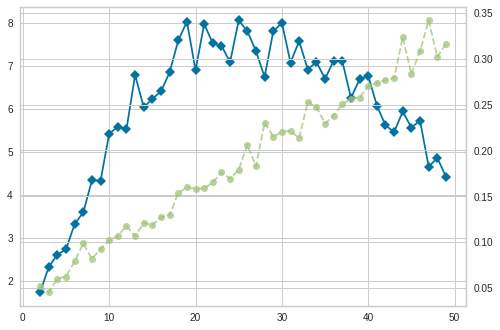

In [8]:
#Find optimum clusters

# Elbow Method for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,50), timings= True)
visualizer.fit(new_x_tfidf.iloc[0:100,:])        # Fit data to visualizer
visualizer       # Finalize and render figure

#We found k=38 to be good based on intersection point of distortion and fit time

#PCA and Clustering based unsupervised learning applied for tfidf

In [10]:
#CAUTION: THIS CELL TAKES AT LEAST 5 MINUTES TO RUN

#PCA on tfidf
from sklearn.decomposition import PCA
import numpy as np

#normalize features
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X = normalizer.fit_transform(new_x_tfidf)

X -= np.mean(X, axis = 0) #center dataset

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# print(int(str(X_r[2,0])[3:4]))


# partition the dataset with K-means
cluster_kmeans = KMeans(n_clusters=38, random_state=0).fit(X_r)
# centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids
# print(centroids)
# partition the dataset with Agglomerative method
cluster_agg = AgglomerativeClustering(n_clusters=38).fit(X_r)

# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn = SpectralClustering(n_clusters=38, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X_r)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf = SpectralClustering(n_clusters=38, assign_labels="discretize", affinity='rbf', random_state=0).fit(X_r)




/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [33]:
#agg clustering variations
cluster_agg_sin = AgglomerativeClustering(n_clusters=38, linkage="single").fit(X_r)
cluster_agg_avg = AgglomerativeClustering(n_clusters=38, linkage="average").fit(X_r)
cluster_agg_comp = AgglomerativeClustering(n_clusters=38, linkage="complete").fit(X_r)

#Visualization of clusters

Text(0.5, 1.0, 'Kmeans')

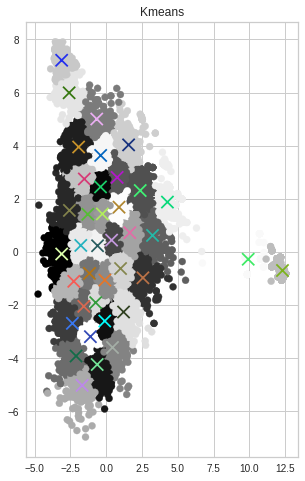

In [34]:
#Visualization
centroids = cluster_kmeans.cluster_centers_

plt.figure(figsize=(40,8))
colors = ['#3248b5','#b0862e','#3fea66','#0466bf','#295d60','#0ad97b','#25b2bf','#367710','#304021','#339c3b','#84864d','#16317d','#232fef','#d63a76','#7cb31d','#f65b55','#bd88ea','#e26ca7','#b1ec5d','#55bd34','#e47629','#a4aea6','#eaadf2','#b57311','#136c48','#d86950','#24b8a7','#b417cb','#40f274','#c398dc','#3977ef','#ba7247','#82824c','#c9932a','#73e397','#01fcfc','#1acd68','#dafcaa']

plt.subplot(1,7,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_kmeans.labels_)
plt.scatter(centroids[:, 0],centroids[:, 1], color=[c for c in colors[:len(centroids)]], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title("Kmeans")


Text(0.5, 1.0, 'Agglomerative method')

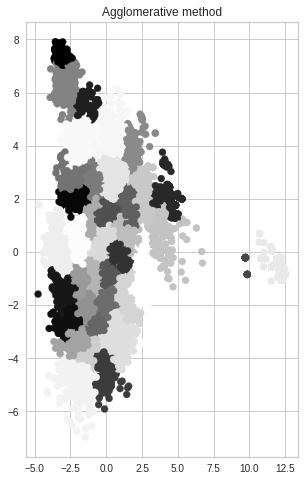

In [35]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_agg.labels_)
plt.title('Agglomerative method')

Text(0.5, 1.0, 'Agglomerative single link method')

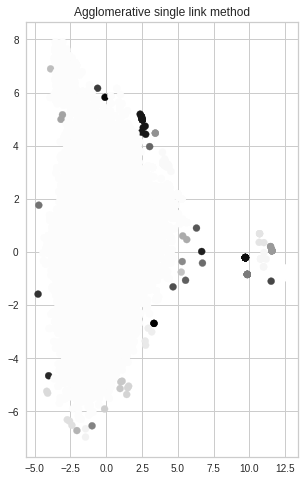

In [38]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,5)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_agg_sin.labels_)
plt.title('Agglomerative single link method')

Text(0.5, 1.0, 'Agglomerative average link method')

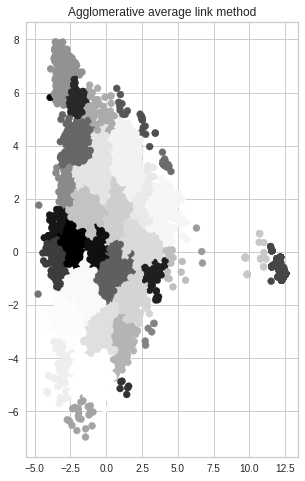

In [39]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,6)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_agg_avg.labels_)
plt.title('Agglomerative average link method')

Text(0.5, 1.0, 'Agglomerative complete link method')

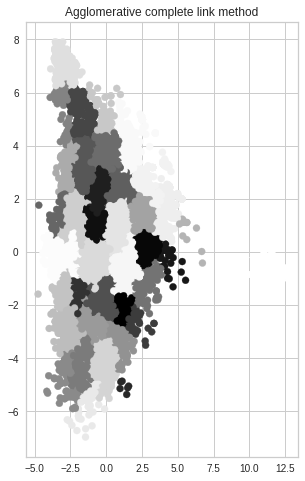

In [40]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,7)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_agg_comp.labels_)
plt.title('Agglomerative complete link method')

Text(0.5, 1.0, 'Spectral clustering (nearest_neighbors)')

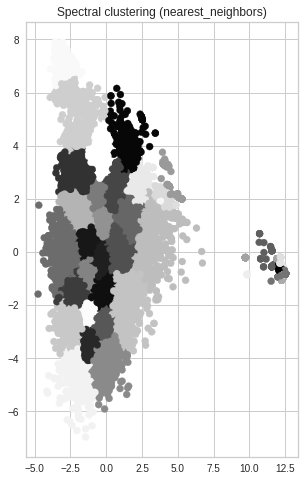

In [41]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,3)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_sp_nn.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

Text(0.5, 1.0, 'Spectral clustering (fully_connected_graph)')

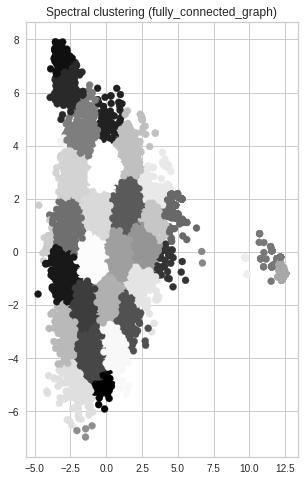

In [42]:
plt.figure(figsize=(40,8))
plt.subplot(1,7,4)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_sp_rbf.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

#3 External performance measures: nmi, accuracy, random score

In [43]:
from sklearn.metrics.cluster import normalized_mutual_info_score

temp = new_y_tfidf.to_numpy()[:,0]

nmi_kmeans = normalized_mutual_info_score(cluster_kmeans.labels_, temp, average_method='arithmetic')
nmi_agg = normalized_mutual_info_score(cluster_agg.labels_, temp, average_method='arithmetic')
nmi_agg_sin = normalized_mutual_info_score(cluster_agg_sin.labels_, temp, average_method='arithmetic')
nmi_agg_avg = normalized_mutual_info_score(cluster_agg_avg.labels_, temp, average_method='arithmetic')
nmi_agg_comp = normalized_mutual_info_score(cluster_agg_comp.labels_, temp, average_method='arithmetic')
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, temp, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, temp, average_method='arithmetic')


print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi_kmeans))
print('The normalized mutual information score of the Agglomerative method is {:.4f}'.format(nmi_agg))
print('The normalized mutual information score of the Agglomerative method single link is {:.4f}'.format(nmi_agg_sin))
print('The normalized mutual information score of the Agglomerative method average link is {:.4f}'.format(nmi_agg_avg))
print('The normalized mutual information score of the Agglomerative method complete link is {:.4f}'.format(nmi_agg_comp))
print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

The normalized mutual information score of the K-means method is 0.2286
The normalized mutual information score of the Agglomerative method is 0.2303
The normalized mutual information score of the Agglomerative method single link is 0.0227
The normalized mutual information score of the Agglomerative method average link is 0.2182
The normalized mutual information score of the Agglomerative method complete link is 0.2212
The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.2207
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.2173


In [49]:
#get accuracy
#Use linear_assignment to apply Hungarian algorithm and reorder confusion matrix by permuting rows to be
#more representative of unsupervised learning rather than classification
from sklearn.metrics import confusion_matrix

def get_accuracy(new_y_tfidf, labels):
    cm = confusion_matrix(new_y_tfidf, labels)
    from sklearn.utils.linear_assignment_ import linear_assignment
    import numpy as np
    def _make_cost_m(cm):
        s = np.max(cm)
        return (- cm + s)
    indexes = linear_assignment(_make_cost_m(cm))
    js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
    cm2 = cm[:, js]
    acc = np.trace(cm2) / np.sum(cm2)
    return acc

print("Kmeans clustering accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_kmeans.labels_)))
print("Agglomerative clustering accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_agg.labels_)))
print("Agglomerative clustering single link accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_agg_sin.labels_)))
print("Agglomerative clustering average link accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_agg_avg.labels_)))
print("Agglomerative clustering complete link accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_agg_comp.labels_)))
print("Spectral clustering nearest neighbors accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_sp_nn.labels_)))
print("Spectral clustering nearest fully connected accuracy score: {}".format(get_accuracy(new_y_tfidf.to_numpy()[:,1], cluster_sp_rbf.labels_)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Kmeans clustering accuracy score: 0.10687919463087249
Agglomerative clustering accuracy score: 0.1058165548098434
Agglomerative clustering single link accuracy score: 0.34060402684563756
Agglomerative clustering average link accuracy score: 0.1512304250559284
Agglomerative clustering complete link accuracy score: 0.13747203579418343
Spectral clustering nearest neighbors accuracy score: 0.11118568232662192
Spectral clustering nearest fully connected accuracy score: 0.14317673378076062


In [62]:
from sklearn.metrics import adjusted_rand_score

kmeans_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_kmeans.labels_)
agg_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_agg.labels_)
agg_sin_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_agg_sin.labels_)
agg_avg_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_agg_avg.labels_)
agg_comp_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_agg_comp.labels_)
sp_nn_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_sp_nn.labels_)
sp_rbf_randscore = adjusted_rand_score(new_y_tfidf.to_numpy()[:,1], cluster_sp_rbf.labels_)

print('Kmeans clustering rand score: ',kmeans_randscore)
print('Agglomerative Clustering rand score: ',agg_randscore)
print('Agglomerative Clustering single link rand score: ',agg_sin_randscore) # bad and means cluster missassignment
print('Agglomerative Clustering average link rand score: ',agg_avg_randscore)
print('Agglomerative Clustering complete link rand score: ',agg_comp_randscore)
print('Spectral clustering nearest neighbor rand score: ',sp_nn_randscore)
print('Spectral clustering fully connected rand score: ',sp_rbf_randscore)

Kmeans clustering rand score:  0.017119242317755863
Agglomerative Clustering rand score:  0.016406025425486293
Agglomerative Clustering single link rand score:  -0.016462338419191293
Agglomerative Clustering average link rand score:  0.01583408841559391
Agglomerative Clustering complete link rand score:  0.016523632763132384
Spectral clustering nearest neighbor rand score:  0.017027496081581876
Spectral clustering fully connected rand score:  0.015952783354074192


#3 Internal performance measures: Dunn's index, Silhoutte index and Davie Bouldin's index

In [31]:
!pip install validclust

In [67]:

# #duns index
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(X_r)
print("Dun's index:")
print("Kmeans clustering ",dunn(dist,cluster_kmeans.labels_))
print("Agglomerative clustering ",dunn(dist,cluster_agg.labels_))
print("Agglomertive single link clustering ",dunn(dist,cluster_agg_sin.labels_))
print("Agglomertive average link clustering ",dunn(dist,cluster_agg_avg.labels_))
print("Agglomertive complete link clustering ",dunn(dist,cluster_agg_comp.labels_))
print("Spectral clustering nearest neighbor ",dunn(dist,cluster_sp_nn.labels_))
print("Spectral clustering fully connected ",dunn(dist,cluster_sp_rbf.labels_))

Dun's index:
Kmeans clustering  0.000574001264303649
Agglomerative clustering  0.006316475340098456
Agglomertive single link clustering  0.024850279166878493
Agglomertive average link clustering  0.0084266117267013
Agglomertive complete link clustering  0.0060666486163262765
Spectral clustering nearest neighbor  1.109959002712845e-08
Spectral clustering fully connected  0.0007117380679321176


In [69]:
#a positive and close to 1 score would mean correct cluster assignment and more dense compaction of cluster, which increases quality
#Silhouette
from sklearn.metrics import silhouette_score
print("Silhouette's Index:")
print("Kmeans clustering ",silhouette_score(X_r, cluster_kmeans.labels_, metric='euclidean'))
print("Agglomerative clustering ",silhouette_score(X_r, cluster_agg.labels_, metric='euclidean'))
print("Agglomertive single link clustering ",silhouette_score(X_r, cluster_agg_sin.labels_, metric='euclidean'))
print("Agglomertive average link clustering ",silhouette_score(X_r, cluster_agg_avg.labels_, metric='euclidean'))
print("Agglomertive complete link clustering ",silhouette_score(X_r, cluster_agg_comp.labels_, metric='euclidean'))
print("Spectral clustering nearest neighbor ",silhouette_score(X_r, cluster_sp_nn.labels_, metric='euclidean'))
print("Spectral clustering fully connected ",silhouette_score(X_r, cluster_sp_rbf.labels_, metric='euclidean'))


Silhouette's Index:
Kmeans clustering  0.3526327140598838
Agglomerative clustering  0.29514879909245495
Agglomertive single link clustering  -0.17044210794294673
Agglomertive average link clustering  0.25616721972532785
Agglomertive complete link clustering  0.26563688677345076
Spectral clustering nearest neighbor  0.29103532372897667
Spectral clustering fully connected  0.31105853499728736


In [70]:
#high score indicates high avg similarity of each cluster with its closest other cluster, here it makes sense
#But lower values are better quality of clustering since more distinct
from sklearn.metrics import davies_bouldin_score
print("Davie Bouldin's Index:")
print("Kmeans clustering ",davies_bouldin_score(X_r, cluster_kmeans.labels_))
print("Agglomerative clustering ",davies_bouldin_score(X_r, cluster_agg.labels_))
print("Agglomertive single link clustering ",davies_bouldin_score(X_r, cluster_agg_sin.labels_))
print("Agglomertive average link clustering ",davies_bouldin_score(X_r, cluster_agg_avg.labels_))
print("Agglomertive complete link clustering ",davies_bouldin_score(X_r, cluster_agg_comp.labels_))
print("Spectral clustering nearest neighbor ",davies_bouldin_score(X_r, cluster_sp_nn.labels_))
print("Spectral clustering fully connected ",davies_bouldin_score(X_r, cluster_sp_rbf.labels_))


Davie Bouldin's Index:
Kmeans clustering  0.7971141561599783
Agglomerative clustering  0.8895380325359473
Agglomertive single link clustering  0.4597314754322908
Agglomertive average link clustering  0.7267401338540984
Agglomertive complete link clustering  0.8642779467470881
Spectral clustering nearest neighbor  1.391648761948635
Spectral clustering fully connected  0.7378571986057603
